## Importing libraries & data

In [2]:
import pandas as pd
import os
from keplergl import KeplerGl
from pyproj import CRS 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv(r"C:\Users\Drew\New_York_CitiBike\02 Data\Prepared Data\CitiBike_NOAA_Rides.csv", dtype={5: 'str', 7: 'str'}, index_col = 0)

## Data Processing

In [4]:
df.columns

Index(['rideable_type', 'started_at', 'ended_at', 'start_station_name',
       'start_station_id', 'end_station_name', 'end_station_id', 'start_lat',
       'start_lng', 'end_lat', 'end_lng', 'member_casual', 'date', 'avgTemp',
       'number_of_rides', '_merge', 'tripduration', 'gender'],
      dtype='object')

In [5]:
df.shape

(29768282, 18)

In [6]:
df

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp,number_of_rides,_merge,tripduration,gender
ride_id,,,,,,,,,,,,,,,,,,
4A091640AEC83471,classic_bike,2022-01-01 16:01:22.082,2022-01-01 16:05:11.986,S 4 St & Wythe Ave,5204.05,Kent Ave & S 11 St,5062.01,40.712859,-73.965903,40.707645,-73.968415,member,2022-01-01,11.6,20428,both,3.831733,male
7A560D6287C00126,classic_bike,2022-01-01 14:07:04.344,2022-01-01 14:31:57.500,Lexington Ave & E 120 St,7652.04,Amsterdam Ave & W 125 St,7800.03,40.801307,-73.939817,40.813358,-73.956461,member,2022-01-01,11.6,20428,both,24.885933,female
4F6F726B809C15E4,classic_bike,2022-01-01 12:02:26.943,2022-01-01 12:14:13.555,Lexington Ave & E 120 St,7652.04,Amsterdam Ave & W 125 St,7800.03,40.801307,-73.939817,40.813358,-73.956461,member,2022-01-01,11.6,20428,both,11.776867,male
3BC10DC94FD79955,classic_bike,2022-01-01 22:53:23.508,2022-01-01 23:18:42.881,Cleveland Pl & Spring St,5492.05,Mott St & Prince St,5561.04,40.722104,-73.997249,40.723180,-73.994800,member,2022-01-01,11.6,20428,both,25.322883,female
FE4CE7F1CFFD7952,classic_bike,2022-01-01 08:04:51.755,2022-01-01 08:08:07.290,Central Park North & Adam Clayton Powell Blvd,7617.07,E 110 St & Madison Ave,7587.14,40.799484,-73.955613,40.796154,-73.947821,member,2022-01-01,11.6,20428,both,3.258917,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F2C4F070A50F9F3B,classic_bike,2022-12-31 13:09:50.131,2022-12-31 13:35:28.984,White St & Moore St,4987.06,Bleecker St & Crosby St,5679.08,40.704508,-73.935100,40.726156,-73.995102,member,2022-12-31,8.2,31466,both,25.647550,female
79F3ED73A2BF585C,classic_bike,2022-12-31 17:33:04.512,2022-12-31 17:37:56.886,Division St & Bowery,5270.08,Centre St & Chambers St,5207.01,40.714193,-73.996732,40.712733,-74.004607,member,2022-12-31,8.2,31466,both,4.872900,male
DDED85920D307CE1,classic_bike,2022-12-31 09:14:53.652,2022-12-31 09:21:11.859,W 30 St & 10 Ave,6459.07,W 20 St & 8 Ave,6224.05,40.752694,-74.002353,40.743453,-74.000040,member,2022-12-31,8.2,31466,both,6.303450,female


### Creating new column with value of 1 followed by a new aggregated dataframe with new columns: starting station, ending station, and the count of trips between those stations

In [7]:
#  create a new column with the value of 1

df['value'] = 1

# create a new aggregated dataframe that contains 3 columns: starting station, ending station, and the count of trips between those stations

df_group = df.groupby(['start_station_name', 'end_station_name'])['value'].count().reset_index()


In [8]:
df_group

,start_station_name,end_station_name,value
0,1 Ave & E 110 St,1 Ave & E 110 St,791
1,1 Ave & E 110 St,1 Ave & E 18 St,2
2,1 Ave & E 110 St,1 Ave & E 30 St,4
3,1 Ave & E 110 St,1 Ave & E 39 St,1
4,1 Ave & E 110 St,1 Ave & E 44 St,12
...,...,...,...
1013392,Yankee Ferry Terminal,Water St & Main St,4
1013393,Yankee Ferry Terminal,West St & Chambers St,6
1013394,Yankee Ferry Terminal,West St & Liberty St,4
1013395,Yankee Ferry Terminal,West Thames St,1


In [9]:
# Rename value column to trips

df_group.rename(columns = {'value' : 'trips'}, inplace = True)

In [10]:
print(df_group['trips'].sum())
print(df.shape)

29768282
(29768282, 19)


In [11]:
df_group['trips'].describe()

count    1.013397e+06
mean     2.937475e+01
std      9.925180e+01
min      1.000000e+00
25%      1.000000e+00
50%      4.000000e+00
75%      1.700000e+01
max      1.204100e+04
Name: trips, dtype: float64

### Trips Insight
    The descriptive analysis shows that the median of bike trips is 4 which suggests that at least half of the station have 4 or fewer trips and indicates that a number of stations are not very popular with customers. While, the mean, or average number of trips, is 29.3, when comparing the mean to the median we can see that there is a big difference between the two. This difference between the mean and median shows that some stations have a high number of trips and prove to be popular areas for riders and has affected the average number of trips drastically. 
    The analysis shows that the minimum number of trips from certain station areas is 1, showing that these areas are not popular with customers. But, we do see that the maximum is totaling a number of trips of 12,041 from certain station(s). This large number of trips helps to indicate that certain areas or stations are very popular with riders and appear to be a heavily traffic area for riders. 
    The standard deviation of 99.25 is very high and shows that the number of trips in the dataframe are very spread out as shown with the prior insight analysis. 

### Exploratory analysis into trips data

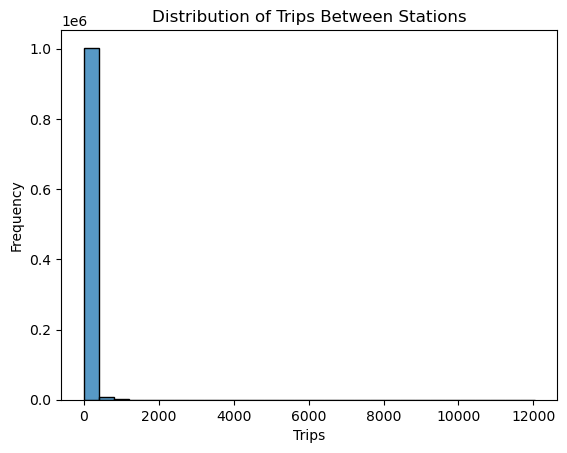

In [12]:
# histogram of the 'trips' column using Seaborn

sns.histplot(df_group['trips'], bins=30)
plt.title("Distribution of Trips Between Stations")
plt.xlabel("Trips")
plt.ylabel("Frequency")
plt.show()

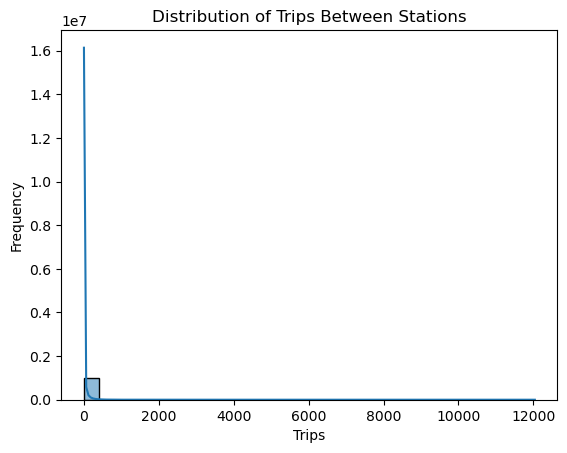

In [13]:
# histogram of the 'trips' column using Seaborn with kde curve

sns.histplot(df_group['trips'], bins=30, kde=True)
plt.title("Distribution of Trips Between Stations")
plt.xlabel("Trips")
plt.ylabel("Frequency")
plt.show()

### Trip frequency insight analysis
         The histogram provided shows a highly right skewed distribution of trips between stations. The histrogram shows that the majority of station connections have low trip counts while a few stations show a much higher usage. Trip data points are found to be clustered in the lowest bin, suggesting that most stations do not see many riders or traffic and emphasizes that the majority of connections are less popular among riders. The right-skewed distribution indicates that some stations are outliers with high trip counts. These outliers likely represent crowded and popular or central hubs with high commuter traffic, possibly located in major commercial areas or tourist destinations. 
         The frequency confirms the high concentration of trips among a select few station pairs that helps show the need to enhance facilities and managing congestion at high-demand locations to improve commuter experience and manage bike inventory in those areas.

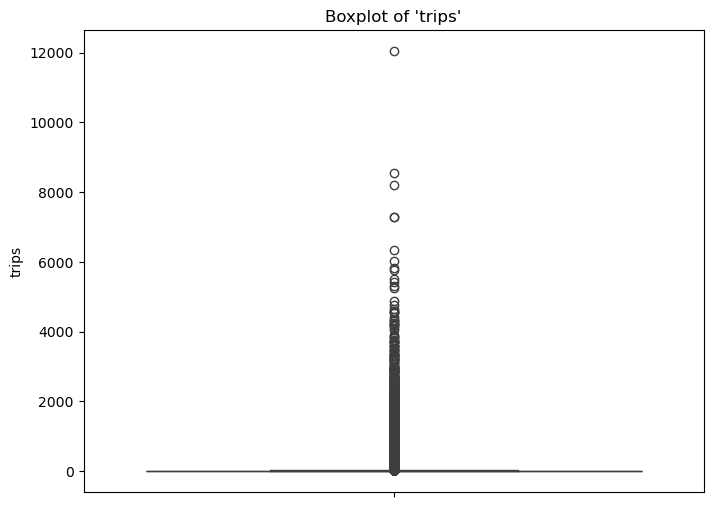

In [14]:
# Create the boxplot with trips using seaborn

plt.figure(figsize=(8, 6))
sns.boxplot(data=df_group, y='trips')
plt.title("Boxplot of 'trips'")
plt.ylabel("trips")
plt.show()

### Boxplot analysis of trips
    The boxplot,similar to the histogram, shows a disparity between the condensed lower portion of the plot and the outliers suggests a highly uneven distribution of trip counts. This uneven distribution shows the majority of station connections see minimal usage while a minority show significantly higher traffic. Based on the boxplot, it can be seen that rider demand is highly concentrated in specific areas that is most likely due to major commuting hubs or popular routes.


In [15]:
df_group['trips'].sort_index().value_counts()

trips
1       268276
2       128313
3        78057
4        54832
5        40763
         ...  
1986         1
1158         1
1682         1
1309         1
5759         1
Name: count, Length: 1848, dtype: int64

In [16]:
# exporting bike trips without geospatial station locations

df_group.to_csv(r"C:\Users\Drew\New_York_CitiBike\Bike_Trips_Groupby_Stations.csv")

In [17]:
df_group.head()

,start_station_name,end_station_name,trips
0,1 Ave & E 110 St,1 Ave & E 110 St,791
1,1 Ave & E 110 St,1 Ave & E 18 St,2
2,1 Ave & E 110 St,1 Ave & E 30 St,4
3,1 Ave & E 110 St,1 Ave & E 39 St,1
4,1 Ave & E 110 St,1 Ave & E 44 St,12


## Preparing data for kepler mapping

In [18]:
# Create a subset or new dataframe with the necessary columns for Kepler.gl
# to visualize individual lines for each trip

df_final = df_group.merge(
    df[['start_station_name', 'start_lat', 'start_lng', 'end_station_name', 'end_lat', 'end_lng']],
    on=['start_station_name', 'end_station_name'],
    how='left',
    indicator='merge_flag')


In [19]:
df_final

,start_station_name,end_station_name,trips,start_lat,start_lng,end_lat,end_lng,merge_flag
0,1 Ave & E 110 St,1 Ave & E 110 St,791,40.792327,-73.938300,40.792327,-73.938300,both
1,1 Ave & E 110 St,1 Ave & E 110 St,791,40.792327,-73.938300,40.792327,-73.938300,both
2,1 Ave & E 110 St,1 Ave & E 110 St,791,40.792327,-73.938300,40.792327,-73.938300,both
3,1 Ave & E 110 St,1 Ave & E 110 St,791,40.792327,-73.938300,40.792327,-73.938300,both
4,1 Ave & E 110 St,1 Ave & E 110 St,791,40.792327,-73.938300,40.792327,-73.938300,both
...,...,...,...,...,...,...,...,...
29768277,Yankee Ferry Terminal,Yankee Ferry Terminal,5759,40.687066,-74.016756,40.687066,-74.016756,both
29768278,Yankee Ferry Terminal,Yankee Ferry Terminal,5759,40.687066,-74.016756,40.687066,-74.016756,both
29768279,Yankee Ferry Terminal,Yankee Ferry Terminal,5759,40.687066,-74.016756,40.687066,-74.016756,both
29768280,Yankee Ferry Terminal,Yankee Ferry Terminal,5759,40.687066,-74.016756,40.687066,-74.016756,both


In [20]:
# dropping unneeded merge_flag column

df_final = df_final.drop(columns = ['merge_flag'])

In [21]:
# Remove duplicates based on start and end station names
# It was seen that after merge, dataframe had duplicate rows of start and end station names that had the same lat and lng.
# lat and lng numbers appeared to be the same so it was determined removal of duplicates by start and end trip paths.
# result was ending with the same number of rows as original dataframe above of df_group

df_final_unique = df_final.drop_duplicates(subset=['start_station_name', 'end_station_name'])

In [22]:
df_final_unique

,start_station_name,end_station_name,trips,start_lat,start_lng,end_lat,end_lng
0,1 Ave & E 110 St,1 Ave & E 110 St,791,40.792327,-73.938300,40.792327,-73.938300
791,1 Ave & E 110 St,1 Ave & E 18 St,2,40.792327,-73.938300,40.733812,-73.980544
793,1 Ave & E 110 St,1 Ave & E 30 St,4,40.792327,-73.938300,40.741444,-73.975361
797,1 Ave & E 110 St,1 Ave & E 39 St,1,40.792327,-73.938300,40.747140,-73.971130
798,1 Ave & E 110 St,1 Ave & E 44 St,12,40.792327,-73.938300,40.750020,-73.969053
...,...,...,...,...,...,...,...
29762508,Yankee Ferry Terminal,Water St & Main St,4,40.687066,-74.016756,40.703212,-73.990409
29762512,Yankee Ferry Terminal,West St & Chambers St,6,40.687066,-74.016756,40.717548,-74.013221
29762518,Yankee Ferry Terminal,West St & Liberty St,4,40.687066,-74.016756,40.711444,-74.014847
29762522,Yankee Ferry Terminal,West Thames St,1,40.687066,-74.016756,40.708347,-74.017134


In [23]:
# exporting unique trip counts with station's geospatial coordinates

df_final_unique.to_csv(r"C:\Users\Drew\New_York_CitiBike\Trips_Geo_Stations.csv")

### Kepler Mapping

In [24]:
# create kepler map based on aggregated bike trips

m = KeplerGl(height=700, data={"Bike Trips": df_final_unique})

m

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'Bike Trips':              start_station_name       end_station_name  trips  start_lat  \
0    …

## Map Setting Format
    The station start locations are colored in red dots while the station end locations have been colored with a cream color. I felt these colors provided a nice contrast to the background and allowed the dots to be easy visually for viewers. Also, by color coding the start and end locations, I feel it helps users to able to more easily identify line progress in crowed popular areas, such as the coastline routes or those routes in the central Manhattan area.

    The arc lines are set up to show the start of the trip in yellow and have the end of the trip fade into an orange-ish color. I feel that this visual transition helps show the flow irection of the trips against the dark background and visually helps viewers follow the path to know where the trip begins and where the trip ends. This transition of color helps provide a look into how riders a commuting and allow users to see which routies appear more frequently as starts and which end frequently end as route destinations. 
    
    The filter used for the map is showing those station pairs that have yielded bike trips of 1000 or greater. 

## Map Analysis

         The map shows that the most common rides for bike trips in New York revolve around the central Manhattan area. When looking closer at the Manhattan area, we can see that the areas around New York University and Columbia University are particularly frequented bike routes for New York riders. These zones tend to show a high volume of bike trips and prove to be a busy area for biking commuters. This high density of riders could be the result of the area's proximity to the universities, commerical centers, and public transit nearby the bike stations.
         In addition to the university areas, the map shows a number of trips along the Manhattan coastline. These trips to coincide with the Hudson River Greenway, which could explain the freqeuncy of bike trips taken along the coastline. These coastline routes provide riders of both recreational and commuting riders scenic routes to their intended destinations. The concentration of trips along the waterfront shows an importance for cycling, offering easy access to various parts of the city and serving as a major throughfare for cyclists.
         A final spot showing notable activity is Central Park area. Central Park sees frequent activity that starts at a specific perimeter point of the park and all rides ending at the other side of the park near Columbus Cirlce. This shows that Central Park serves as a crucial connecting station for bikers traveling between Upper Manhattan and Midtown Manhattan, aiding in north-south traffic for work commutes, school trips, and social gatherings in the Midtown area.


In [30]:
config = m.config

In [31]:
config

{'version': 'v1',
 'config': {'visState': {'filters': [{'dataId': ['Bike Trips'],
     'id': '1q8rzkx7w',
     'name': ['trips'],
     'type': 'range',
     'value': [1000, 12041],
     'enlarged': False,
     'plotType': 'histogram',
     'animationWindow': 'free',
     'yAxis': None,
     'speed': 1}],
   'layers': [{'id': 'zlup8ae',
     'type': 'point',
     'config': {'dataId': 'Bike Trips',
      'label': 'start',
      'color': [187, 0, 0],
      'highlightColor': [252, 242, 26, 255],
      'columns': {'lat': 'start_lat', 'lng': 'start_lng', 'altitude': None},
      'isVisible': True,
      'visConfig': {'radius': 10,
       'fixedRadius': False,
       'opacity': 0.8,
       'outline': False,
       'thickness': 2,
       'strokeColor': None,
       'colorRange': {'name': 'Global Warming',
        'type': 'sequential',
        'category': 'Uber',
        'colors': ['#5A1846',
         '#900C3F',
         '#C70039',
         '#E3611C',
         '#F1920E',
         '#FFC300']},
 

In [27]:
import json
with open("config.json", "w") as outfile:
    json.dump(config, outfile)

In [28]:
# save kepler map as html file

m.save_to_html(file_name = 'CitiBike Bike Trips Aggregated Map.html', read_only = False, config = config)

Map saved to CitiBike Bike Trips Aggregated Map.html!
